In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Running and interacting with LLMs
  1. Intro to LLMs  
    - What is a language model?   
    - What are large language models    
  2. What are Transformers
    - Tokenization  
    - Embeddings    
    - Self-attention
  3. 📚 Further Reading – Recommended Resources to Explore After the Workshop  
    - A bit more attention on the self-attention
    - What is Reinforcement learning   
      - Key components  
      - Key Features
    - Mixture of Experts
      - What is MoE?  
      - Key Components  
      - Key Features  

## 1. Intro to LLMs



### What is a language model?

<!-- A language model is a machine learning model designed to predict and generate plausible language. Autocomplete is an example of a language model.

These models work by estimating the probability of a token or sequence of tokens occurring within a longer sequence of tokens.  -->

A **language model (LM)** is a statistical or machine learning model that **assigns a probability to sequences of words or tokens** in a language. In simpler terms, an LM learns which word (or token) is likely to come next given the preceding text. For example, a good language model would give a higher probability to the sequence "the cat sat on the **mat**" than to "the cat sat on the **banana**" because the former is more linguistically plausible.

<!-- At its core, an LM estimates the joint probability of a sequence of tokens $P(w_1, w_2, \ldots, w_n)$. This is typically factorized into the product of conditional probabilities:

$[
P(w_1, w_2, \ldots, w_n) = P(w_1) \times P(w_2 \mid w_1) \times \cdots \times P(w_n \mid w_1, \ldots, w_{n-1})
$] -->

Modern language models learn these conditional probabilities from large datasets, enabling them to predict the next word and even generate coherent text.

---

Consider the following sentence:

When I hear rain on my roof, I _______ in my kitchen.

If you assume that a token is a word, then a language model determines the probabilities of different words or sequences of words to replace that underscore. For example, a language model might determine the following probabilities:

- cook soup 9.4%
- warm up a kettle 5.2%
- cower 3.6%
- nap 2.5%
- relax 2.2%


### What are large language models
Large language models (LLMs) are deep learning models based on the Transformer architecture, pre-trained on vast amounts of data. A Transformer consists of an encoder and/or decoder, depending on the model type. Some models use only an encoder (e.g., BERT), others use only a decoder (e.g., GPT-4), and some use both (e.g., T5). These models leverage self-attention mechanisms to process sequences of text, enabling them to learn contextual relationships between words and phrases from their training data.


<details>
<summary>Click here for answers</summary>

1. B - Encoder-only models like BERT excel at understanding text and are typically used for tasks like sentiment analysis, text classification, and named entity recognition.
  
2. A - Decoder-only models like GPT focus on generating text and are used for tasks like story writing, chatbots, and content creation.
  
3. C - Encoder-decoder models like T5 or BART excel at transforming text from one form to another and are ideal for tasks like translation, summarization, and question answering.
</details>

## 2. What are Transformers

A key development in language modeling was the introduction in 2017 of Transformers, an architecture designed around the idea of attention. This made it possible to process longer sequences by focusing on the most important part of the input, solving memory issues encountered in earlier models.
Transformers are the state-of-the-art architecture for a wide variety of language model applications, such as translators.

If the input is "I am a good dog.", a Transformer-based translator transforms that input into the output "Je suis un bon chien.", which is the same sentence translated into French.

For the task of translation, this is a text to text task and requires the full transformers to consist of an encoder and a decoder. An encoder converts input text into an intermediate representation, and a decoder converts that intermediate representation into useful text. However, as we shall see different architectures (how the self-attention, general deep learning layers, and encoder/decoder layers are put together) are necessary for slightly different tasks.

Variations for Different Tasks

Encoder‑only (e.g., BERT) excels at understanding or classification: it reads a snippet and predicts masked words or labels.

Decoder‑only (e.g., GPT) excels at generation: given a prompt, it continues writing coherent text.

Encoder–decoder (e.g., T5) remains the go to for any task that can be framed as “input → output.”

Reference
Paper: https://arxiv.org/abs/1706.03762

Easily Explained: https://luv-bansal.medium.com/transformer-attention-is-all-you-need-easily-explained-with-illustrations-d38fdb06d7db

In [ ]:
             ┌────────────────────────────┐
             │         Encoder            │
             └────────────────────────────┘
Text ─▶ Tokenization ─▶ Tokens ─▶ Embeddings ─▶ Self Attention (×N layers) ─▶ Contextual Vectors
                                                                             │
                                                                             ▼
             ┌────────────────────────────┐
             │         Decoder            │
             └────────────────────────────┘
 Text   ─▶ Tokenization ─▶ Tokens ─▶ Embeddings ─▶ Self Attention ─►
                                                       │
                                                       ▼
                                                  Self Attention
                                                       │
                                                       ▼
                                        Feed Forward & Projection
                                                       │
                                                       ▼
                                         Context Aware Output Tokens


This of it like baking a cake

Encoder (chopping, measuring & mixing your raw ingredients)

Tokenization → “Chop ingredients”

Embeddings → “Measure ingredients”

Self‑Attention layers → “Mix ingredients”

Output: the fully mixed batter, i.e. Contextual Vectors

Decoder (using the batter to bake the cake and decorate it)

Takes those Contextual Vectors plus its own “decorations” (previous tokens)

Tokenization → Embeddings → Self‑Attention (“prepare your decorating tools”)

Encoder–Decoder Attention (“refer back to the batter”)

Feed‑Forward & Projection (“bake & frost”)

Output: the final cake slices, i.e. Context‑Aware Output Tokens

# 🧠 Knowledge Check: Different Types of LLMs

Match each LLM type with its correct description:

Encoder-only models     A. Focus on generating text (GPT family)

Decoder-only models     B. Good at understanding text (BERT family)

Encoder-decoder models  C. Translate from one form to another (T5)

### Tokenization
Tokenization is the process of converting text into smaller units called tokens (words, subwords, or characters). It is a crucial step in preparing text for LLMs.
- **What**: Splits text into smaller units (words, subwords, characters).  
- **Analogy**: Cutting a sentence into Lego blocks.  
- **Example**:  
  - Input: "Transformers are cool!"
  - Tokens: ["Transform", "ers", " are", " cool", "!"] (Please note both "Transform" and the suffix "ers" appear frequently enough in the training corpus to merit their own tokens)
  
- **Key Point**: Computers need standardized, bite-sized pieces to process language.



In [ ]:
!pip3 install -q tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.5 MB/s eta 0:00:00


In [ ]:
import tiktoken

# Load GPT-4 Turbo tokenizer
encoding = tiktoken.encoding_for_model("gpt-4-turbo")

text = "hello world"

# Tokenize text
tokens = encoding.encode(text)
decoded_tokens = encoding.decode(tokens)
token_strings = [encoding.decode([token]) for token in tokens]

print("Token IDs:", tokens)
print("Tokens:", token_strings)
print("Decoded Text:", decoded_tokens)

Token IDs: [15339, 1917]
Tokens: ['hello', ' world']
Decoded Text: hello world


# 🧪 Interactive Exercise: Explore Tokenization

Try tokenizing your own text! Type a sentence in the cell below and see how it gets broken down into tokens.

In [ ]:
# Enter your own text to tokenize
your_text = "This is cool Pedram!"

# Tokenize it
your_tokens = encoding.encode(your_text)
your_token_strings = [encoding.decode([token]) for token in your_tokens]

print(f"Your text: '{your_text}'")
print(f"Number of tokens: {len(your_tokens)}")
print("\nTokens:")
for i, (token_id, token_string) in enumerate(zip(your_tokens, your_token_strings)):
    print(f"  {i+1}. ID: {token_id}, Token: '{token_string}'")

Your text: 'This is cool Pedram!'
Number of tokens: 6

Tokens:
  1. ID: 2028, Token: 'This'
  2. ID: 374, Token: ' is'
  3. ID: 7155, Token: ' cool'
  4. ID: 19878, Token: ' Ped'
  5. ID: 2453, Token: 'ram'
  6. ID: 0, Token: '!'


### Embeddings
Embeddings are numerical representations of words or sentences. They capture semantic meaning and relationships between words.

- **What**: Converts tokens into numerical vectors.  
- **Analogy**: Giving each token an "ID card" with its meaning encoded.  
- **Example**: Calculated with pre-trained Glove model: glove-wiki-gigaword-50
  - "cat" → [-0.14604   0.13289  -0.12199  0.055319 -0.05397  -0.10106...]  
  - "kitten" → [-0.19226   0.11152  -0.10454  0.032987 -0.06945  -0.07351...]  
- **Key Point**: Similar words get similar vectors (e.g., "cat" ≈ "kitten").

<!-- - **Types of Embeddings**:
    - Word Embeddings: Represent individual words (e.g., Word2Vec, GloVe).
    - Sentence Embeddings: Represent entire sentences (e.g., BERT embeddings) -->



PCA: Principal Component Analysis: fundamentally a mathematical technique that transforms data from its original coordinate system to a new, typically lower dimensional, coordinate system that better reveals the structure of the data.

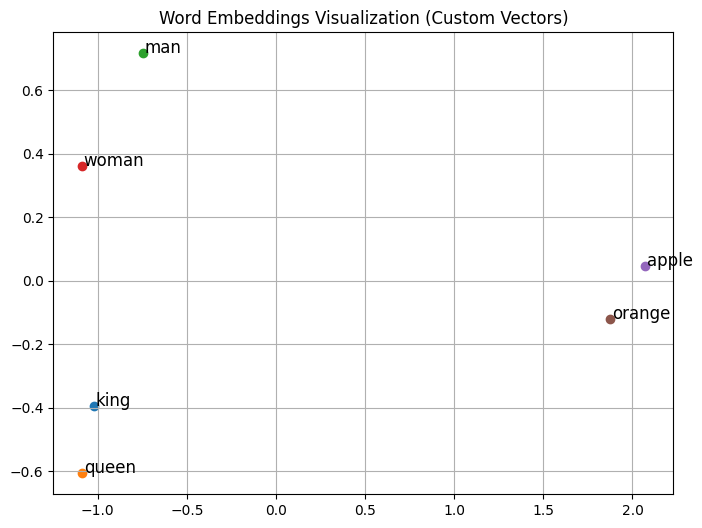

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Below embeddings come from glove-wiki-gigaword-25 (25 dimensions)
word_embeddings_25d = {
    "king":   [0.5042, 0.6861, -0.5954, -0.022, -0.6571, 0.2141, 0.0156, 0.3332, -0.771, -0.3173,
               -0.3977, 0.5115, -0.1461, -0.166, 1.224, 0.9099, -0.1333, 0.2312, -0.1765, -0.1326,
               -0.1241, -1.1052, -0.0676, -0.1498, 0.872],
    "queen":  [0.318, 0.982, -0.1461, 0.0675, -0.7463, 0.3567, -0.6349, 0.4868, -0.6283, -0.466,
               -0.5184, 0.5623, -0.3616, -0.3253, 1.501, 0.6805, -0.2084, 0.114, -0.0142, -0.2512,
               -0.4365, -1.1888, -0.3161, -0.2438, 0.793],
    "man":    [0.2023, 0.4603, -0.2516, -0.1795, -0.857, 0.0511, -0.2258, 0.3099, -0.6566, -0.2501,
               -0.1691, 0.1634, -0.3952, 0.1854, 1.01, 0.3843, 0.1127, 0.3541, -0.3306, -0.558,
               -0.1227, -1.3477, -0.4123, -0.4017, 0.571],
    "woman":  [0.1642, 0.6947, -0.3783, -0.1271, -1.1294, 0.1061, -0.3097, 0.4616, -0.5755, -0.4218,
               -0.3883, 0.2776, -0.3152, 0.0361, 1.331, 0.6208, 0.0572, 0.2892, -0.1981, -0.3821,
               -0.2183, -1.3821, -0.487, -0.4305, 0.523],
    "apple":  [-0.1459, 0.2621, 0.0434, -0.1662, 0.3515, 0.4255, -0.317, -0.3979, 0.5588, 0.3544,
               0.3402, 0.0126, -0.5514, -0.0165, 0.521, -0.0225, 0.1218, -0.3434, 0.702, 0.0853,
               0.5885, -0.5182, -0.1584, -0.4383, 0.0391],
    "orange": [-0.0865, 0.4916, 0.0225, -0.1065, 0.3173, 0.6329, -0.3101, -0.3022, 0.5472, 0.1939,
               0.2565, 0.0564, -0.3884, -0.0921, 0.6107, -0.0811, 0.138, -0.3297, 0.5971, 0.1213,
               0.4641, -0.6471, -0.0835, -0.4618, -0.0454]
}

words = list(word_embeddings_25d.keys())
embeddings = np.array([word_embeddings_25d[word] for word in words])

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.text(reduced_embeddings[i, 0] + 0.01, reduced_embeddings[i, 1], word, fontsize=12)
plt.title("Word Embeddings Visualization (Custom Vectors)")
plt.grid(True)
plt.show()

### Self-attention



> Add blockquote



Self-Attention relates each word (or token) in a sentence to every other word so that each can incorporate relevant context from the entire sequence. By allowing tokens to “look at” each other, the model captures long-range dependencies and nuanced relationships.

  Compute Query, Key, and Value Vectors
  For each token in the sequence, generate three vectors:
        
      
        Query (Q): What each token is looking for. Represents what this token is looking for in other tokens.
        
        Key (K): What tokens offers. Helps identify what meaningful information this token can provide to others.
        
        Value (V): Actual information retrieved. Contains the actual information content of this token.

  Calculate Scaled Dot-Product Attention
       
        Compute attention scores by taking the dot product of each Query with every Key.
        
        Scale these scores by the dimension of the queries/keys to prevent them from becoming too large.
        
        Pass these scores through a softmax function to turn them into weights, representing how strongly each token should attend to every other token.

  Create Weighted Sums
        
        Multiply each set of Value vectors by the normalized attention weights.
        
        Sum them up to obtain a new representation for each token, one that incorporates relevant information from the entire sequence.


<!-- In Short:

What: Self-Attention determines how tokens relate to and influence each other.
    
Analogy: Think of Self-Attention as a spotlight that highlights which tokens each token should focus on to create a richer overall representation. -->


#Take aways


*   Tokens are numeric subword units, not whole words.
* LLMs break text into pieces (subwords) and map them to numbers—so tasks like “count the R’s in ‘Strawberry’” aren’t straightforward.
*   Embeddings place tokens in a vector space.
* Each token becomes a vector, letting the model quantify and compare their meanings via distance and direction.
* Self‑attention mixes those vectors to capture context.
* Every token “looks at” every other token, then updates its vector to reflect relevant relationships across the entire input.
* Transformers process the full input in parallel, not sequentially.
* Unlike RNNs or CNNs that read text step‑by‑step or in windows, Transformers use self‑attention to see all tokens at once—enabling efficient learning of long‑range dependencies.

# 📚 Further Reading – Recommended Resources to Explore After the Workshop

### We will use a simple example "Miniature Eiffel Tower" to illustrate the flow of self attention

- Example refer to https://www.youtube.com/watch?v=eMlx5fFNoYc 3Blue1Brown

#### Understanding Context with Self-Attention:

- The word "Tower" alone could refer to any tower.
 <image src= 'https://i.ytimg.com/vi/dUYgdBoxAgI/mqdefault.jpg'>

- When attending to "Eiffel", it helps specify the meaning—now "Tower" refers to the Eiffel Tower.

 <image src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/Tour_Eiffel_Wikimedia_Commons_%28cropped%29.jpg/250px-Tour_Eiffel_Wikimedia_Commons_%28cropped%29.jpg'>


- When attending to "Miniature", it adds size information—now it’s a small Eiffel Tower.

<image src = 'https://shop.toureiffel.paris/876-medium2col_mobile/eiffel-tower-bronze-17-cm-signature-collection.jpg'>



#### How Self-Attention Works in This Case:
- Query (Q, "Tower"): "What are the adjectives or descriptors before me?"
- Keys (K, "Miniature", "Eiffel"): Each token provides information relevant to the query.
- Values (V, "Miniature*", "Eiffel*"): Instead of just copying words, V carries transformed information that helps refine the meaning of "Tower".

#### Final Representation of "Tower":

- The attention mechanism assigns weights to "Miniature" and "Eiffel" based on their relevance.

- The final embedding for "Tower" is updated dynamically—it now incorporates both Eiffel (location) and Miniature (size), making its meaning more precise.

**Step 1**: Define Input Tokens and Embeddings

Consider the sentence with three tokens: `["Miniature", "Eiffel", "Tower"]`. Each token has a simple 4-dimensional embedding (for simplicity, the embeddings are dummy data):

$$
X = \begin{bmatrix}
1 & 0 & 1 & 0 \\
0 & 2 & 0 & 2 \\
1 & 1 & 1 & 1
\end{bmatrix}
$$

**Step 2**: Define Query (Q), Key (K), and Value (V) Matrices

For simplicity, we set the projection matrices \( W_Q, W_K, W_V \) identical. In real-world models, these are learned separately, but we use the same matrix for clarity:

$$
W_Q = W_K = W_V = \begin{bmatrix}
1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 \\
1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1
\end{bmatrix}
$$

**Step 3**: Compute Q, K, and V

The queries, keys, and values are computed as:

$$
Q = X W_Q, \quad K = X W_K, \quad V = X W_V
$$


**Step 4**: Compute Attention Scores

The self-attention mechanism computes attention weights. Scaling factor is sqrt(dim(key)) and is done after the dot product:

$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^\top}{\sqrt{dk}}\right)V
$$

<!-- - Compute \( QK^T \).
- Scale by \( \sqrt{d_k} = 2 \).
- Apply softmax row-wise. -->

**Step 5**: Compute Final Attention Output

The attended output is:

$$
\text{Output} = \text{Attention Weights} \times V
$$

In [ ]:
import numpy as np

# Step 1: Define Input Tokens (Embeddings)
X = np.array([
    [1, 0, 1, 0],  # Miniature
    [0, 2, 0, 2],  # Eiffel
    [1, 1, 1, 1]   # Tower
])

# Step 2: Define Projection Matrices
W = np.array([
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1]
])

W_Q = W_K = W_V = W  # Using same matrix for simplicity

# Step 3: Compute Q, K, V
Q = X @ W_Q
K = X @ W_K
V = X @ W_V

# Step 4: Compute Attention Scores
scores = (Q @ K.T) / np.sqrt(4)  # Scale by sqrt(dk)
attention_weights = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)  # Softmax

# Step 5: Compute Final Attention Output -Using V instead of X because V is transformed from X, which allows the models to learn better representations for passing impormation
output = attention_weights @ V

print("Attention Weights:\n", attention_weights)
print("\nSelf-Attention Output:\n", output)

Attention Weights:
 [[4.95462643e-01 9.07471484e-03 4.95462643e-01]
 [1.12497423e-07 9.99664537e-01 3.35350093e-04]
 [9.07471484e-03 4.95462643e-01 4.95462643e-01]]

Self-Attention Output:
 [[1.98185057e+00 1.02722414e+00 1.98185057e+00 1.02722414e+00]
 [6.70925180e-04 3.99932885e+00 6.70925180e-04 3.99932885e+00]
 [1.00907471e+00 2.97277586e+00 1.00907471e+00 2.97277586e+00]]


Think of self-attention as recalculating the representation of each token based on how its meaning is influenced by other tokens in the same sentence


"Transformers read text by breaking it into pieces (tokenization), turning those pieces into numbers (embeddings), and then figuring out how they connect (self-attention)

## Reinforcement learning and Mixture of Expert

### What is Reinforcement learning

Reinforcement learning (RL) is a machine learning (ML) technique that trains software to make decisions to achieve the most optimal results. It mimics the trial-and-error learning process that humans use to achieve their goals. Software actions that work towards your goal are reinforced, while actions that detract from the goal are ignored.

RL algorithms use a reward-and-punishment paradigm as they process data. They learn from the feedback of each action and self-discover the best processing paths to achieve final outcomes. The algorithms are also capable of delayed gratification. The best overall strategy may require short-term sacrifices, so the best approach they discover may include some punishments or backtracking along the way.

In LLMs, RL is often used for fine-tuning models via methods like Reinforcement Learning with Human Feedback (RLHF). For example:
Fine-tuning GPT models to align their responses with human preferences.
Training chatbots to optimize user satisfaction scores.



<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*VXHAuJz9WBq1Yck6Lenx5w.png" width="600" height="400" />
credit:Medium

#### Key components


- Agent: The decision-maker (e.g., a robot, software bot).
- Environment: The system the agent interacts with.
- Actions: Choices the agent can make.
- State: The current situation of the environment.
- Reward: Feedback signal for the agent's actions.

The **model-based** algorithms use transition and reward functions to estimate the optimal policy and create the model.
In contrast, **model-free** algorithms learn the consequences of their actions through the experience without transition and reward function.

The **value-based** method trains the value function to learn which state is more valuable and take action. On the other hand, **policy-based** methods train the policy directly to learn which action to take in a given state.

In the **off-policy**, the algorithm evaluates and updates a policy that differs from the policy used to take an action. Conversely, the **on-policy** algorithm evaluates and improves the same policy used to take an action.  

#### Key Features

- Focuses on sequential decision-making (e.g., games, robotics).

- Uses exploration vs. exploitation trade-offs.

- Examples: AlphaGo, self-driving cars, recommendation systems.

Pros:
- ✅ Handles dynamic, uncertain environments.
- ✅ Ideal for long-term planning (e.g., strategy games).


Cons:
- ❌ Computationally expensive (requires massive trial-and-error).
- ❌ Reward design is critical and often non-trivial.

More on RL:

https://medium.com/@Kaushik_Dayalan/reinforcement-learning-for-starters-77565d836014

https://www.datacamp.com/tutorial/introduction-q-learning-beginner-tutorial

https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf



### Mixture of Experts

#### What is MoE?

Mixture of Experts is a neural network architecture that divides a model into multiple specialized sub-networks called "experts". A gating network dynamically selects which experts to activate for a given input, enabling efficient and scalable computations.

MoE is used in LLMs to Scale up models efficiently by activating only relevant parts of the network. Improve performance on diverse tasks by leveraging specialized experts. Reduce computational overhead compared to dense models. For example, in GPT-style models, MoE can route different tokens or tasks to specific experts, improving task-specific performance.

<!-- ![MoE](https://media.datacamp.com/cms/google/ad_4nxdq8i4bstqj0w_tdfr2b5genubfgwb-famqpslboeibobz_eo-ebfk97yhtz2ysjibjy7jrddakula55af3zjtmgan7fmpivcdp5njivfk8nt1nyznxq5fv0bfconxomekmk-s33mpbwdu-ajuhcil14wc7.png) credit:datacamp -->

<img src="https://media.datacamp.com/cms/google/ad_4nxdq8i4bstqj0w_tdfr2b5genubfgwb-famqpslboeibobz_eo-ebfk97yhtz2ysjibjy7jrddakula55af3zjtmgan7fmpivcdp5njivfk8nt1nyznxq5fv0bfconxomekmk-s33mpbwdu-ajuhcil14wc7.png" width="600" height="600" />
credit:datacamp

#### Key Components


- Input: This is the problem or data you want the AI to handle.
- Experts: These are smaller AI models, each trained to be really good at a specific part of the overall problem. Think of them like the different specialists on your team.
- Gating network: This is like a manager who decides which expert is best suited for each part of the problem. It looks at the input and figures out who should work on what.
    - Top-k routing: This is the simplest method. The gating network picks the top 'k' experts with the highest affinity scores and sends the input data to them.
    - Expert choice routing: In this method, instead of the data choosing the experts, the experts decide which data they can handle best. This strategy aims to achieve the best load balancing and allows for a varied way of mapping data to experts.
    - Sparse routing: This approach only activates a few experts for each piece of data, creating a sparse network. Sparse routing uses less computational power compared to dense routing, where all experts are active for every piece of data.
- Output: This is the final answer or solution that the AI model produces after the experts have done their work.



#### Key Features

- Focuses on model efficiency and specialization.

- Experts handle different input domains (e.g., language, vision).

- Examples: Google’s Switch Transformer, advanced NLP models.

Pros:
- ✅ Scalable: Experts can be trained in parallel.
- ✅ Efficient inference (only activate relevant experts).

Cons:
- ❌ Complex to train (coordination between experts and gating).
- ❌ Risk of expert underutilization ("rich get richer" problem)

More on MoE: https://www.datacamp.com/blog/mixture-of-experts-moe



https://www.cs.princeton.edu/courses/archive/fall22/cos597G/


